In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as ss
from scipy.integrate import quad

In [3]:
%matplotlib notebook

In [4]:
sensor1= './data/PJx3YW.AI51C5BP03_REAL.csv'
sensor2='./data/PJx3YW.AI51C5BP01_REAL.csv'
sensor3='./data/PJx3YW.AI51C5BP02_REAL.csv'
sensor4='./data/PJx3YW.AI51C5AT02_REAL.csv'
sensor5='./data/PJx3YW.AI51C5BT01_REAL.csv'
sensor6='./data/PJx3YW.AI51C5BT02_REAL.csv' #firstly used
sensor7='./data/PJx3YW.AI51C5BT03_REAL.csv'

In [5]:
sensor1= './data/PJx3YW.AI51C4AT01_REAL.csv'
sensor2='./data/PJx3YW.AI51C4BT01_REAL.csv'
sensor3='./data/PJx3YW.AI51C4AT02_REAL.csv'
sensor4='./data/PJx3YW.AI51C4BT02_REAL.csv'

dataset1 =  pd.read_csv(sensor1).iloc[:,2].values.reshape(-1,1)
dataset2 =  pd.read_csv(sensor2).iloc[:,2].values.reshape(-1,1)
dataset3 =  pd.read_csv(sensor3).iloc[:,2].values.reshape(-1,1)
dataset4 =  pd.read_csv(sensor4).iloc[:,2].values.reshape(-1,1)

In [6]:
scaler_1 = MinMaxScaler()
scaler_2 = MinMaxScaler()
scaler_3 = MinMaxScaler()
scaler_4 = MinMaxScaler()

In [7]:
X_train1 = scaler_1.fit_transform(dataset1).reshape(-1)
X_train2 = scaler_2.fit_transform(dataset2).reshape(-1)
X_train3 = scaler_3.fit_transform(dataset3).reshape(-1)
X_train4 = scaler_4.fit_transform(dataset4).reshape(-1)

In [8]:
X_test1 = X_train1
X_test2 = X_train2
X_test3 = X_train3
X_test4 = X_train4

<IPython.core.display.Javascript object>


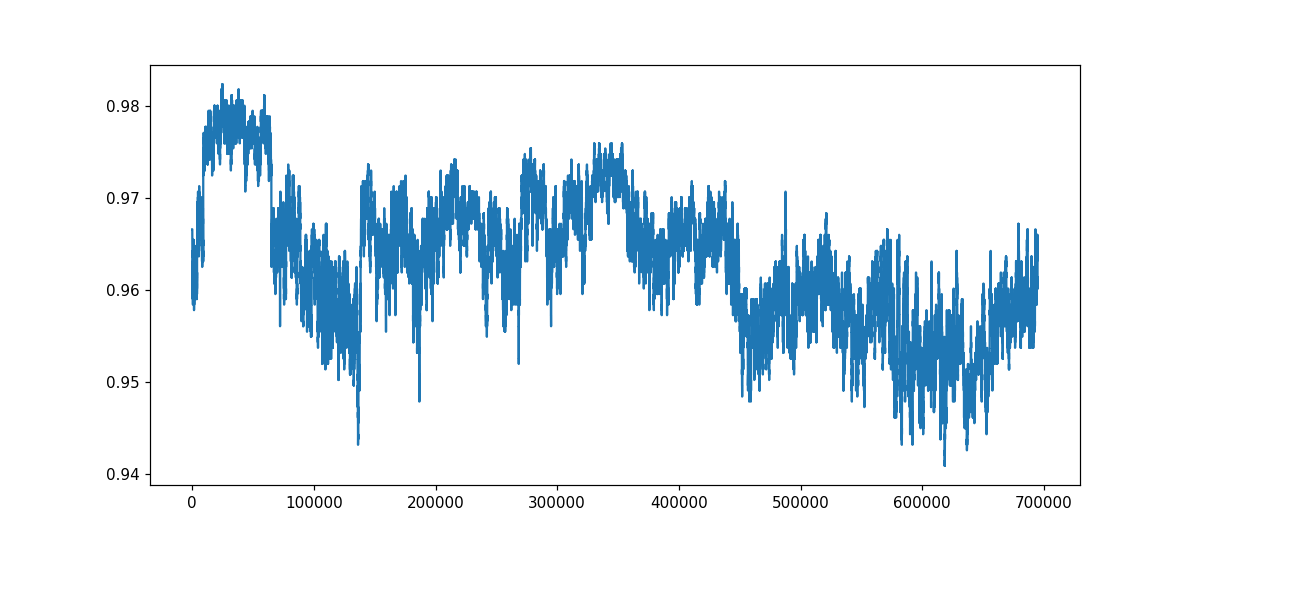

In [11]:
plt.figure(figsize=(11, 5))

#500000:3500000,3800000:6000000,9500000:9750000,11600000:12000000

plt.plot(range(len(X_train2[np.r_[0:4000,18000:23000,42000:76000,81000:103000,180000:250000,2800000:3360000]])),
         X_train2[np.r_[0:4000,18000:23000,42000:76000,81000:103000,180000:250000,2800000:3360000]])
plt.show()

<IPython.core.display.Javascript object>


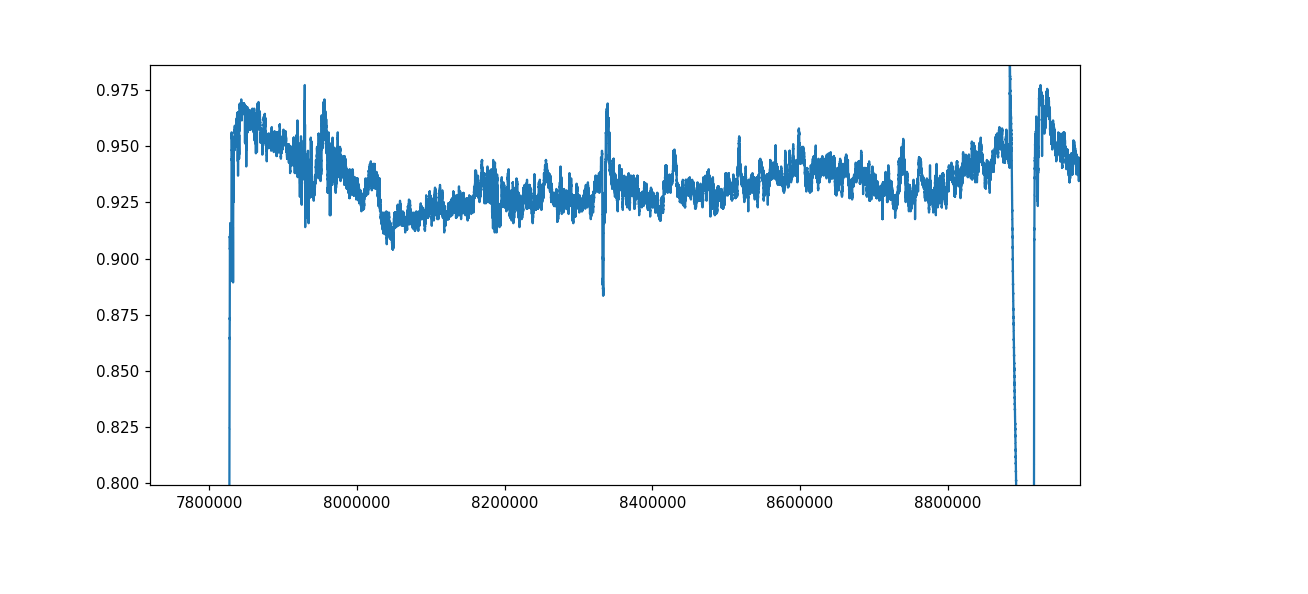

In [249]:
plt.figure(figsize=(11, 5))
plt.plot(range(len(X_train2)),X_train2)
plt.show()

<IPython.core.display.Javascript object>


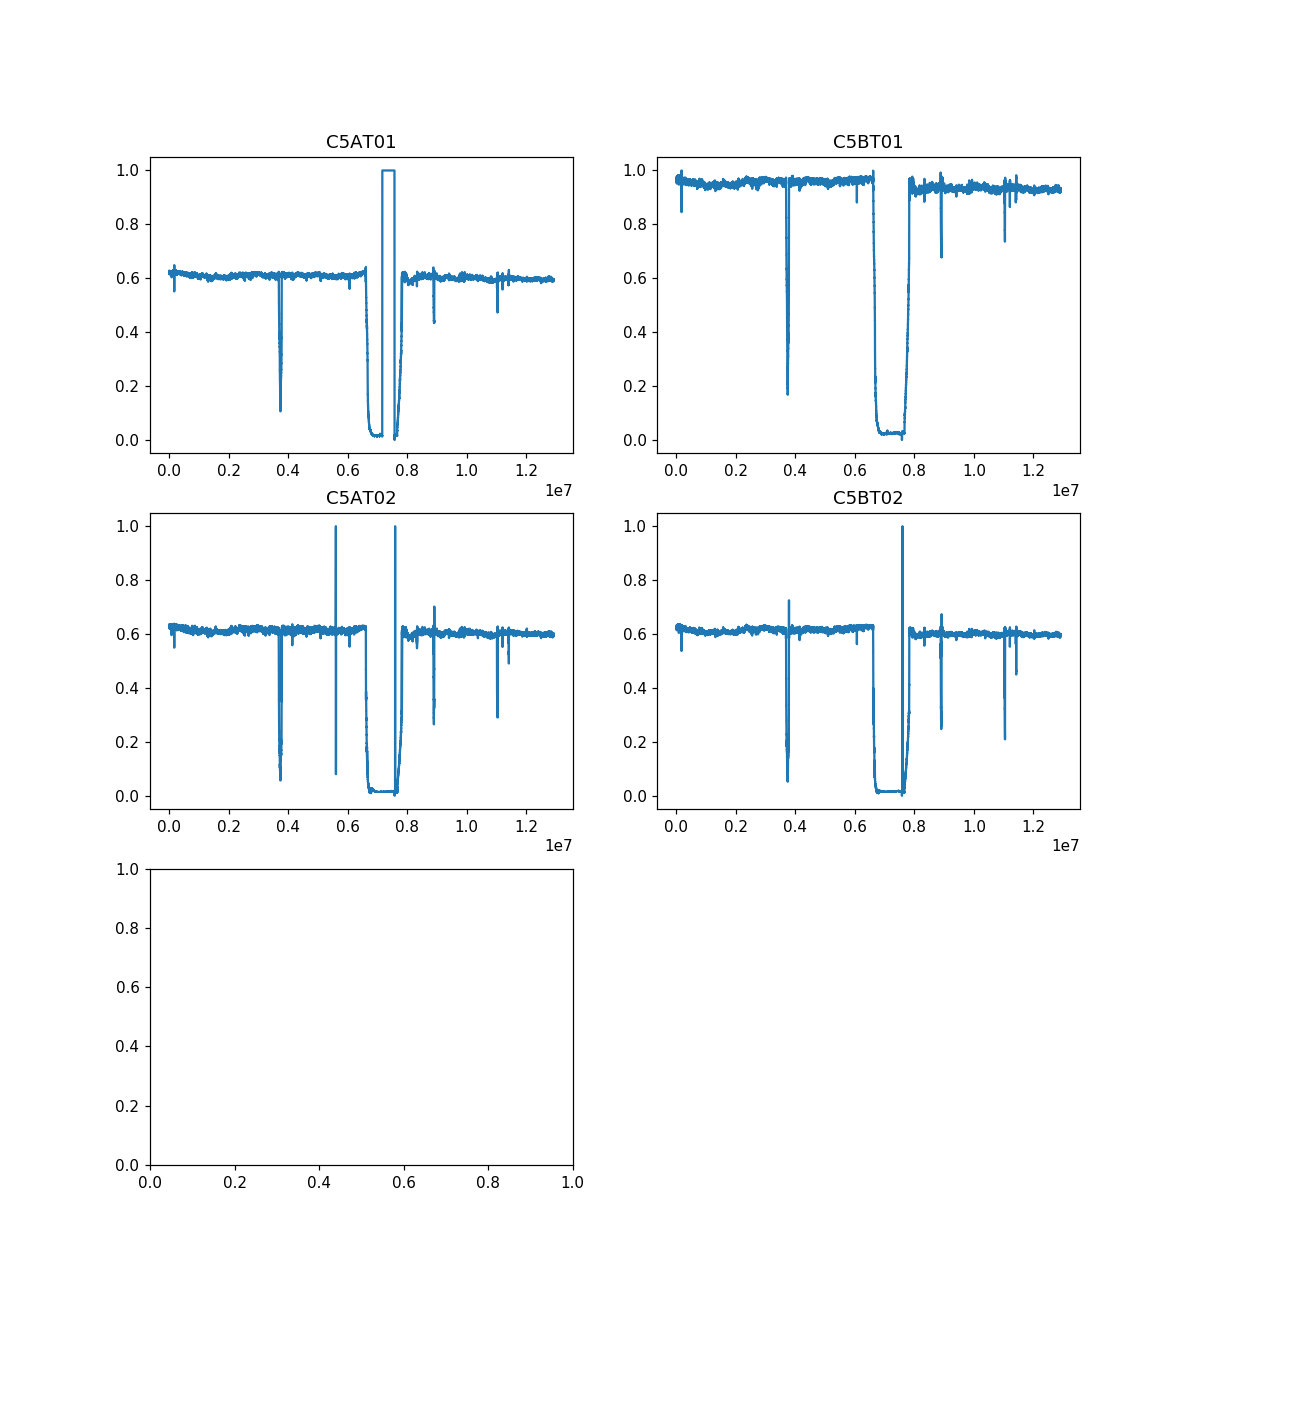

"\nplt.plot(range(len(X_train5)),X_train5)\nplt.title('C5AT03')\nplt.subplot(326)\nplt.plot(range(len(X_train6)),X_train6)\nplt.title('C5BT03')\nplt.show()\n"

In [24]:
plt.figure(figsize=(11, 12))
plt.subplot(321)
plt.plot(range(len(X_train1)),X_train1)
plt.title('C5AT01')
plt.subplot(322)
plt.plot(range(len(X_train2)),X_train2)
plt.title('C5BT01')
plt.subplot(323)
plt.plot(range(len(X_train3)),X_train3)
plt.title('C5AT02')
plt.subplot(324)
plt.plot(range(len(X_train4)),X_train4)
plt.title('C5BT02')
plt.subplot(325)
'''
plt.plot(range(len(X_train5)),X_train5)
plt.title('C5AT03')
plt.subplot(326)
plt.plot(range(len(X_train6)),X_train6)
plt.title('C5BT03')
plt.show()
'''

In [1058]:
seq_len = 128

batch_size = 128

def generate_sequence(data,seq_len):
    
    num_sequence =  len(data) // seq_len
    
    all_sequence = []
    for i in range(num_sequence):
        all_sequence.append(data[i*seq_len:(i+1)*seq_len])
    return all_sequence 

def generate_batch(data , batch_size):
    
    num_batch =  len(data) // batch_size
    train_data = []
    for i in range(num_batch):
        train_data.append(data[i*batch_size:(i+1)*batch_size])
    return train_data

In [1059]:
def normal_data_extractor(data, mylist,seq_len,batch_size):
    all_data =[]
    for i in range(len(mylist)):
        values =mylist[i]
        subdata =  data[values[0]:values[1]]
        subdata_seq = generate_sequence(subdata,seq_len)
        subdata_seq_batch = generate_batch(subdata_seq , batch_size)
        all_data.extend(subdata_seq_batch)
    return all_data

In [1060]:
'''
list_1 = [[200000,1800000],[4200000,5000000],[9000000,9400000],[9500000,10200000],[10400000,11000000],[11600000,12000000],[12200000,12900000]]
X_train_batch1 = normal_data_extractor(X_train1, list_1,seq_len,batch_size)

list_2 = [[400000,1800000],[4200000,5500000]]
X_train_batch2 = normal_data_extractor(X_train2, list_2,seq_len,batch_size)


list_3 = [[0,80000],[100000,170000],[225000,375000],[480000,625000],[850000,1050000],[4200000,4400000],[10050000,10250000],[10400000,11000000]]
X_train_batch3 = normal_data_extractor(X_train3, list_3,seq_len,batch_size)
                                
list_4 = [[0,70000],[200000,1000000],[1200000,2000000],[4200000,5000000],[5200000,6000000],[8360000,8800000],[9000000,9400000],[12200000,12800000]]
X_train_batch4 = normal_data_extractor(X_train4, list_4,seq_len,batch_size)

list_6 = [[0,70000],[200000,1000000],[1200000,2000000],[4200000,5000000],[5200000,5000000],[8360000,8800000],[9000000,9400000],[12200000,12800000]]
X_train_batch6 = normal_data_extractor(X_train6, list_6,seq_len,batch_size)

'''


'''
FOR C5
list_1 = [[200000,400000],[450000,740000],[1800000,1950000]]
X_train_batch1 = normal_data_extractor(X_train1, list_1,seq_len,batch_size)


list_2 = [[500000,2000000],[4400000,5000000]]
X_train_batch2 = normal_data_extractor(X_train2, list_2,seq_len,batch_size)
                            
    
list_3 = [[0,70000],[200000,1000000],[1200000,2000000],[4200000,5000000],[5200000,6000000],[8360000,8800000],[9000000,9400000],[12200000,12800000]]
X_train_batch3 = normal_data_extractor(X_train3, list_3,seq_len,batch_size)

list_4 = [[0,70000],[200000,1000000],[1200000,2000000],[4200000,5000000],[5200000,5600000],[8360000,8800000],[9000000,9400000],[12200000,12800000]]
X_train_batch4 = normal_data_extractor(X_train4, list_4,seq_len,batch_size)


list_5 = [[600000,1800000],[4500000,6000000]]
X_train_batch5 = normal_data_extractor(X_train5, list_5,seq_len,batch_size)

'''

list_1 = [[184250,3680000]]
X_train_batch1 = normal_data_extractor(X_train1, list_1,seq_len,batch_size)

#500000:3500000,3800000:6000000,9500000:9750000,11600000:12000000
#[0,75000],[85000,160000],,[6100000,6600000]
#[9500000,9750000],[11600000,12000000]
#[8000000,82000000],[8400000,8800000],
#[8925000,9750000],[10000000,11000000],[11600000,12000000]

list_2 = [[200000,3500000],[3800000,6000000],[6100000,6600000]]
X_train_batch2 = normal_data_extractor(X_train2, list_2,seq_len,batch_size)
                            
    
list_3 = [[500000,3500000]]
X_train_batch3 = normal_data_extractor(X_train3, list_3,seq_len,batch_size)

list_4 = [[500000,3500000]]
X_train_batch4 = normal_data_extractor(X_train4, list_4,seq_len,batch_size)


In [1061]:
X_train1.shape 

(12926884,)

In [1062]:
len(X_train_batch2)

365

In [1063]:
X_test_seq1 = generate_sequence(X_test1,seq_len)
X_test_batch1 = generate_batch(X_test_seq1, batch_size)

X_test_seq2 = generate_sequence(X_test2,seq_len)
X_test_batch2 = generate_batch(X_test_seq2, batch_size)

X_test_seq3 = generate_sequence(X_test3,seq_len)
X_test_batch3 = generate_batch(X_test_seq3, batch_size)

X_test_seq4 = generate_sequence(X_test4,seq_len)
X_test_batch4 = generate_batch(X_test_seq4, batch_size)


'''
X_test_seq5 = generate_sequence(X_test5,seq_len)
X_test_batch5 = generate_batch(X_test_seq5, batch_size)

X_test_seq6 = generate_sequence(X_test6,seq_len)
X_test_batch6 = generate_batch(X_test_seq6, batch_size)

X_test_seq7 = generate_sequence(X_test7,seq_len)
X_test_batch7 = generate_batch(X_test_seq7, batch_size)


'''


'\nX_test_seq5 = generate_sequence(X_test5,seq_len)\nX_test_batch5 = generate_batch(X_test_seq5, batch_size)\n\nX_test_seq6 = generate_sequence(X_test6,seq_len)\nX_test_batch6 = generate_batch(X_test_seq6, batch_size)\n\nX_test_seq7 = generate_sequence(X_test7,seq_len)\nX_test_batch7 = generate_batch(X_test_seq7, batch_size)\n\n\n'

In [1064]:
def deepautoencoder(layer , num_inputs,X,activation):
    hidden_layer = []
    hidden_layer.append(X)
    for i in range(0,len(layer)):
        hidden = fully_connected(hidden_layer[i], layer[i], activation_fn=activation)
        hidden_layer.append(hidden)
    output_layer = fully_connected(hidden_layer[i+1], num_inputs, activation_fn=None)
    middle_layer = hidden_layer[len(hidden_layer)//2]
    return output_layer , middle_layer

In [1065]:
tf.reset_default_graph() 
def train_DAE(num_inputs,layer , num_epochs , learning_rate,X_train_batch ,X_test_batch ):
    
    actf = tf.nn.relu
    act_func = tf.nn.relu
    X = tf.placeholder(tf.float32, shape=[None, num_inputs])
    initializer = tf.variance_scaling_initializer()
    output_layer , middle_layer = deepautoencoder(layer ,num_inputs,X, act_func)
    loss = tf.reduce_mean(tf.square(output_layer - X))
    
    #tf.train.RMSPropOptimizer
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train = optimizer.minimize(loss)
    init = tf.global_variables_initializer()
    saver = tf.train.Saver() 
    
    
    # Training
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            
            all_loss = []
            num_batches = len(X_train_batch)
            X_batch = X_train_batch[0]
            for iteration in range(1,num_batches):
                sess.run(train, feed_dict={X: X_batch})
                X_batch = X_train_batch[iteration]
                all_loss.append(loss.eval(feed_dict={X: X_batch}) )
                

            training_loss = np.array(all_loss).mean()

            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))


        train_lost = []
        train_output = []
        X_batch_train =  X_train_batch[0]
        for i in range(0,len(X_train_batch)):
            train_lost.append(loss.eval(feed_dict = {X:X_batch_train}))
            train_output.append(output_layer.eval(feed_dict = {X:X_batch_train} ))
            X_batch_train =  X_train_batch[i]


        test_lost = []
        test_output = []
        X_batch_test =  X_test_batch[0]
        for i in range(0,len(X_test_batch)):
            test_lost.append(loss.eval(feed_dict = {X:X_batch_test}))
            test_output.append(output_layer.eval(feed_dict = {X:X_batch_test} ))
            X_batch_test =  X_test_batch[i]
            
        return train_output , test_output

In [1066]:
def pdf_expo(mse,lambda_):
    return lambda_*np.exp(-lambda_*np.array(mse))

In [1067]:
def compute_exponential_distribution(mse):
    n = len(mse)
    lambda_ = (n)/sum(mse)
    return lambda_

In [1068]:
def prob_expo(error, lambda_):
    return np.exp(-lambda_*np.array(error))

In [1069]:
def compute_error(X_input, X_recons):
    mse_all = []
    for i in range(len(X_input)):
        mse = ((X_input[i] - X_recons[i]) ** 2).mean(axis=1)
        mse_all.extend(mse)
    return mse_all

In [1130]:
train_data = X_train_batch4
test_data = X_test_batch4
train_output , test_output = train_DAE(seq_len,[32,16,32],100,0.01,train_data,test_data)

Epoch 0 Complete. Training Loss: 0.006901822052896023
Epoch 1 Complete. Training Loss: 3.865725375362672e-05
Epoch 2 Complete. Training Loss: 0.000106012899777852
Epoch 3 Complete. Training Loss: 1.4334325896925293e-05
Epoch 4 Complete. Training Loss: 1.4205844308889937e-05
Epoch 5 Complete. Training Loss: 2.0209905414958484e-05
Epoch 6 Complete. Training Loss: 2.820047302520834e-05
Epoch 7 Complete. Training Loss: 2.471274638082832e-05
Epoch 8 Complete. Training Loss: 2.5606914277886972e-05
Epoch 9 Complete. Training Loss: 2.6162462745560333e-05
Epoch 10 Complete. Training Loss: 2.4865921659511514e-05
Epoch 11 Complete. Training Loss: 2.7572088583838195e-05
Epoch 12 Complete. Training Loss: 2.608515387692023e-05
Epoch 13 Complete. Training Loss: 3.250995359849185e-05
Epoch 14 Complete. Training Loss: 4.119034929317422e-05
Epoch 15 Complete. Training Loss: 2.5291466954513453e-05
Epoch 16 Complete. Training Loss: 2.3552265702164732e-05
Epoch 17 Complete. Training Loss: 2.352852970943786

In [1131]:
mse_train = compute_error(train_data,train_output)
lambda_expon = compute_exponential_distribution(mse_train)
prob_train = prob_expo(mse_train, lambda_expon)

In [1132]:
mse_test = compute_error(test_data,test_output)
prob_test = prob_expo(mse_test, lambda_expon)

<IPython.core.display.Javascript object>


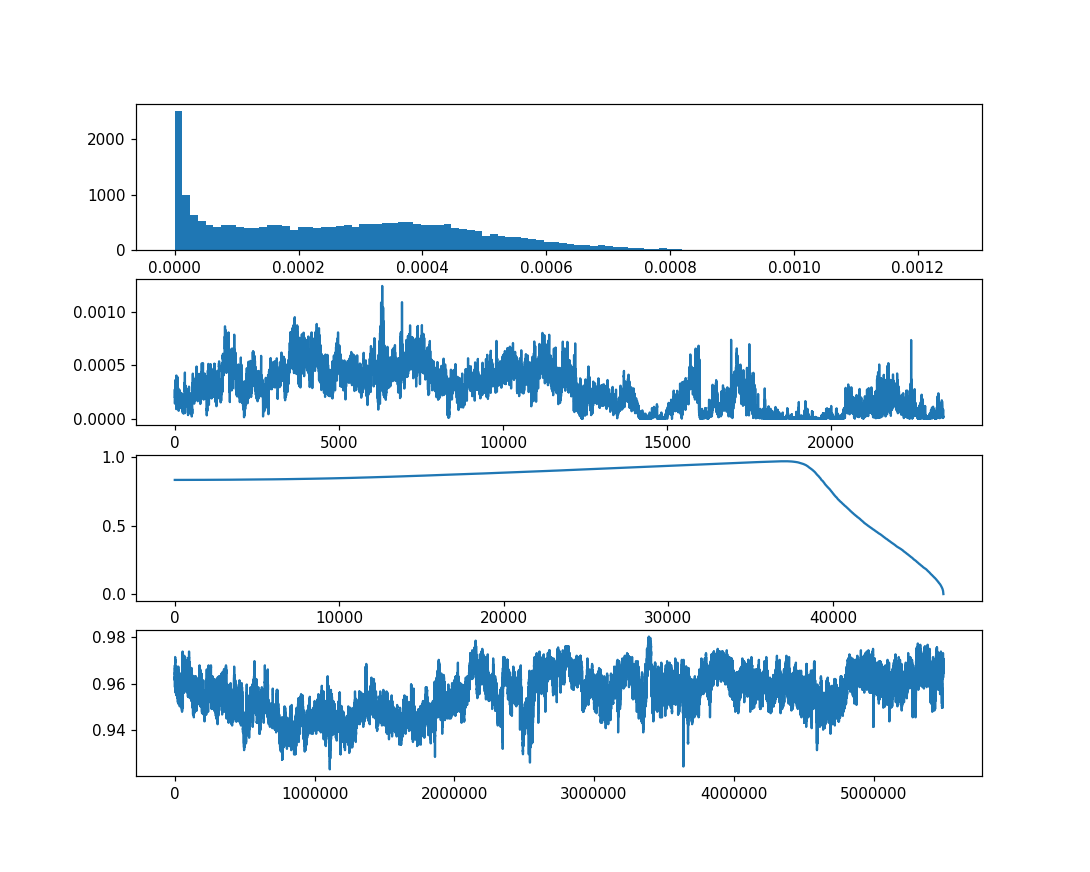

In [1133]:
# a is your data array
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.hist(mse_train,100)
plt.subplot(412)
plt.plot(mse_train)
plt.subplot(413)
plt.plot(prob_train2)
plt.subplot(414)
plt.plot(X_train2[np.r_[200000:3500000,3800000:6000000,6100000:600000]])
plt.show()

<IPython.core.display.Javascript object>


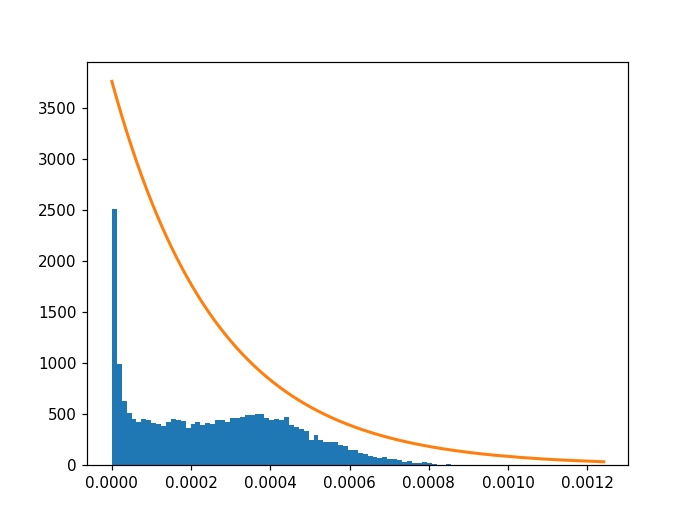

In [1134]:
# a is your data array
plt.figure()
sort_data = mse_train
sort_data.sort()
plt.hist(mse_train,100)
h = plt.plot(mse_train, pdf_expo(mse_train,lambda_expon), lw=2)
#h = plt.plot(mse_train,ss.norm.pdf(mse_train, 0.00019, 0.000107), lw=2)
plt.show()

In [1135]:
from sklearn.neighbors import KernelDensity

In [1136]:
np.std(mse_train)

0.0001979786103691504

<IPython.core.display.Javascript object>


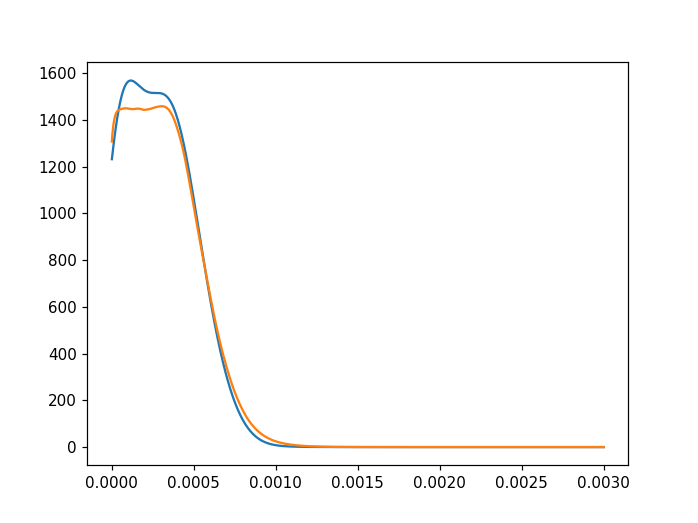

In [1137]:
# kernel density estimate using sklean 
fig, ax = plt.subplots()

X =np.array(mse_train).reshape((-1,1))
bandwidth = np.std(mse_train)
for kernel in ['gaussian', 'exponential']:
       
    kde = KernelDensity(kernel=kernel,bandwidth = 0.0001).fit(X)
    X_plot = np.linspace(0, 0.003, 1000)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot, np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))
    
#ax.plot(X[:, 0], -0.005 - 0.01*np.random.random(X.shape[0]), '+k')

In [1138]:
np.array(mse_train).shape

(23424,)

<IPython.core.display.Javascript object>


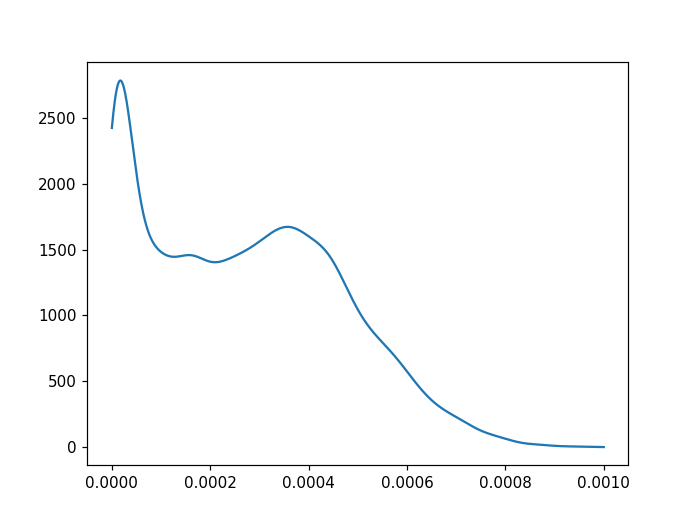

In [1140]:
#Kernel density estimate using scipy 
fig, ax = plt.subplots()
kde_sp = ss.gaussian_kde(np.array(mse_train))
X_plot = np.linspace(0, 0.001, 1000)[:, np.newaxis]
X_plot= X_plot.reshape(-1)
log_dens = kde_sp.pdf(X_plot)
ax.plot(X_plot, log_dens, '-',)


In [1141]:
def compute_prob_scipy(all_mse, integrale_range , kde):
    probs = []
    for i in range(len(all_mse)):
        if i%1000 == 0:
            print('Iteration = ',i)
        mse =  all_mse[i]
        probs.append(kde.integrate_box_1d(mse - integrale_range, mse +integrale_range))
    return probs

In [1142]:
def compute_prob_sklean(all_mse, integrale_range , kde):
    probs = []
    for i in range(len(all_mse)):
        mse =  all_mse[i]
        probs.append(quad(lambda x: np.exp(kde.score_samples(x)), mse - integrale_range, mse +integrale_range)[0])
        #print("mse:",mse,"prob :",probs[i])
    return probs

In [1143]:
len(mse_test)

100864

In [1144]:
prob_train2  = compute_prob_scipy(mse_train , 0.0005, kde_sp)

Iteration =  0
Iteration =  1000
Iteration =  2000


KeyboardInterrupt: 

In [1145]:
prob_test2  = compute_prob_scipy(mse_test , 0.0005, kde_sp)

Iteration =  0
Iteration =  1000
Iteration =  2000
Iteration =  3000
Iteration =  4000
Iteration =  5000
Iteration =  6000
Iteration =  7000
Iteration =  8000
Iteration =  9000
Iteration =  10000
Iteration =  11000
Iteration =  12000
Iteration =  13000
Iteration =  14000
Iteration =  15000
Iteration =  16000
Iteration =  17000
Iteration =  18000
Iteration =  19000
Iteration =  20000
Iteration =  21000
Iteration =  22000
Iteration =  23000
Iteration =  24000
Iteration =  25000
Iteration =  26000
Iteration =  27000
Iteration =  28000
Iteration =  29000
Iteration =  30000
Iteration =  31000
Iteration =  32000
Iteration =  33000
Iteration =  34000
Iteration =  35000
Iteration =  36000
Iteration =  37000
Iteration =  38000
Iteration =  39000
Iteration =  40000
Iteration =  41000
Iteration =  42000
Iteration =  43000
Iteration =  44000
Iteration =  45000
Iteration =  46000
Iteration =  47000
Iteration =  48000
Iteration =  49000
Iteration =  50000
Iteration =  51000
Iteration =  52000
Iterat

In [1146]:
min(prob_train2)

0.0015770592074272052

<IPython.core.display.Javascript object>


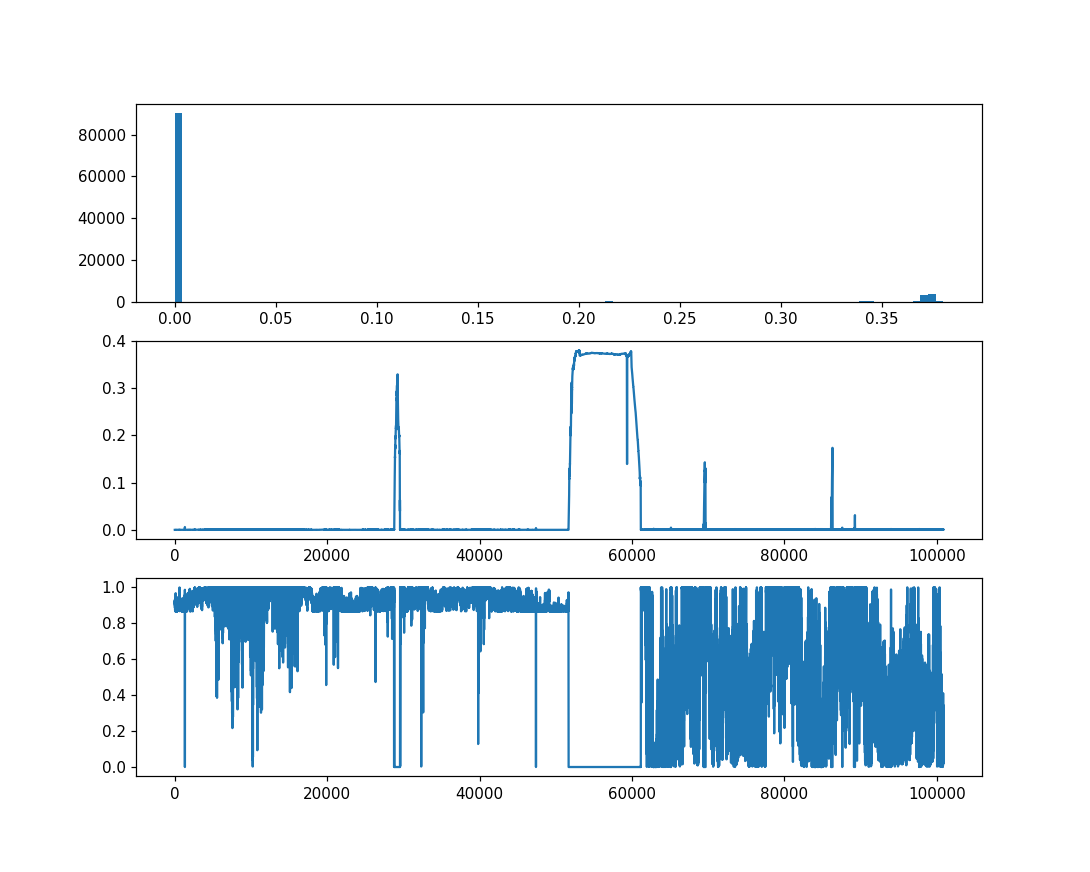

In [1147]:
# a is your data array
plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.hist(mse_test,100)
plt.subplot(312)
plt.plot(mse_test)
plt.subplot(313)
plt.plot(prob_test2)
plt.show()

In [1148]:
min_error = min(prob_train2)
min_error

0.0015770592074272052

In [1149]:
def find_anomalies_prob(prob,threshold):
    list_anomalies = []
    for i in range(len(prob)):
        if prob[i]<=threshold:
            list_anomalies.append(i)
    return list_anomalies

In [1167]:
'''
fOR C5
threshold = 1.24e-02
threshold = 0.02 #C5AT01
threshold = 0.1 #C5BT01
threshold = 0.1#C5AT02
threshold = 0.1#C5BT02
threshold = 0.1#C5AT03

'''

threshold = 0.2 #C4AT01
#threshold = 0.1  #C4BT01
#threshold = 0.1  #C4AT02
#threshold = 0.1  #C4BT02


list_anomlies = find_anomalies_prob(prob_test2,threshold)

In [1168]:
def find_contiguous_colors(colors):
    # finds the continuous segments of colors and returns those segments
    segs = []
    curr_seg = []
    prev_color = ''
    for c in colors:
        if c == prev_color or prev_color == '':
            curr_seg.append(c)
        else:
            segs.append(curr_seg)
            curr_seg = []
            curr_seg.append(c)
        prev_color = c
    segs.append(curr_seg) # the final one
    return segs
 
def plot_multicolored_lines(x,y,colors):
    segments = find_contiguous_colors(colors)
    plt.figure(figsize=(10, 3))
    start= 0
    for seg in segments:
        end = start + len(seg)
        if start == 0 :
            l, = plt.gca().plot(x[start:end],y[start:end],lw=2,c=seg[0])
        else:
            l, = plt.gca().plot(x[start-1:end],y[start-1:end],lw=2,c=seg[0])
        start = end
    return segments

In [1169]:
def plot_anomalies(anomalies, data,seq_len):
    
    colors = []
    for i in range(len(data)):
        colors.append('blue')
        
    for i in range(len(anomalies)):
        one_anomalies = anomalies[i]*seq_len
        for j in range(seq_len):
            colors[one_anomalies+j] = 'red'
    x = range(len(data))
    y = data 

    segments = plot_multicolored_lines(x,y,colors)
    plt.show()
    return 

<IPython.core.display.Javascript object>


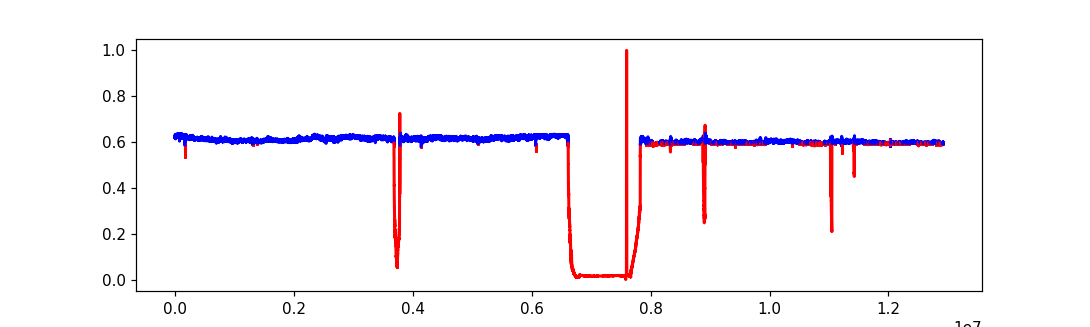

In [1170]:
plot_anomalies(list_anomlies, X_test4,seq_len)

In [1623]:
def anamalie_detection(sensors , model):

SyntaxError: unexpected EOF while parsing (<ipython-input-1623-99e8dd457cd1>, line 1)